## Problem Statement:

- Prediction of wine_type(red/white)
- Prediction of quality label (low, medium and high)
- Problem Type - Classification(Since the response variable(wine_type and quality_label) are categorical)

### Dataset:

The dataset has been taken from UCI Machine Learning Repository under the name of Wine Quality Dataset.
Dataset Link:
https://archive.ics.uci.edu/dataset/186/wine+quality

SL = 0.1


### Attributes:

- fixed acidity
- volatile acidity
- citric acid
- residual sugars
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

quality We have 2 files , one for red_wine and other for white_wine

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("winequality-red.csv", delimiter=';')


In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
data.quality.value_counts() #UnBalanced Dataset

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
print("Rows, columns: " + str(data.shape))

Rows, columns: (1599, 12)


In [27]:
# Check and remove all duplicate records from the dataframe (drop_duplicates)

data.drop_duplicates(inplace=True)

In [28]:
print("Rows, columns: " + str(data.shape))  # we had 240 dublicates

Rows, columns: (1359, 12)


In [30]:
data.quality.unique().tolist()

[5, 6, 7, 4, 8, 3]

As we can see, the name of some columns contains spaces, which is something we do not really want when treating data,

this is why we are going to replace these spaces with "_".


In [31]:
#Replace spaces with _ for each column
data.columns = data.columns.str.replace(' ', '_')

In [32]:
#We check there are no missing values and no object data types

data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Data Exploration

After checking our dataset is fine and "ready to go" we are going to explore the data a little bit more,

we are going to plot important information that will help us check how features behave and how they are correlated.

We will also try to extract as much information as we can from it to help us understand the dataset better.

Knowing our target variable is "quality".we are now going to plot some information about it.

Let's see which values this column contains and how many of them there are.

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

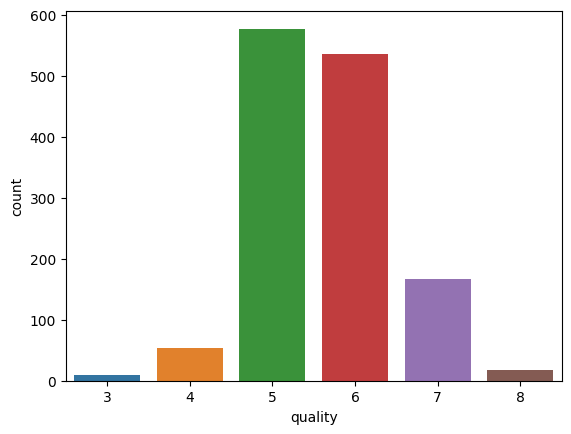

In [38]:
#let's start visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(x = data['quality'])
#sns.countplot(df['quality'])

data['quality'].value_counts()

Now that we got information about our target variable we are going to study the correlation between quality and other features.

and see which are the ones that play an important role in deciding the quality of a wine.

In [41]:
#Calculate and order correlations
correlations = data.corr()['quality'].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total_sulfur_dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64

<Axes: >

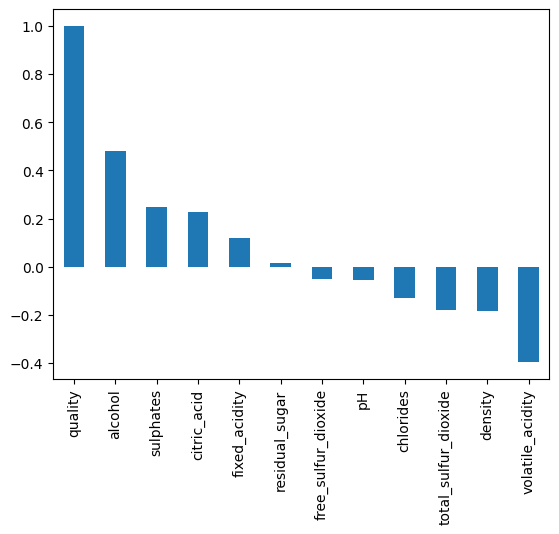

In [42]:
correlations.plot(kind='bar')

Having now the correlation values between quality and the other features, let's have a look at the correlation matrix to have a better understanding of how features correlate with each other.

<Axes: >

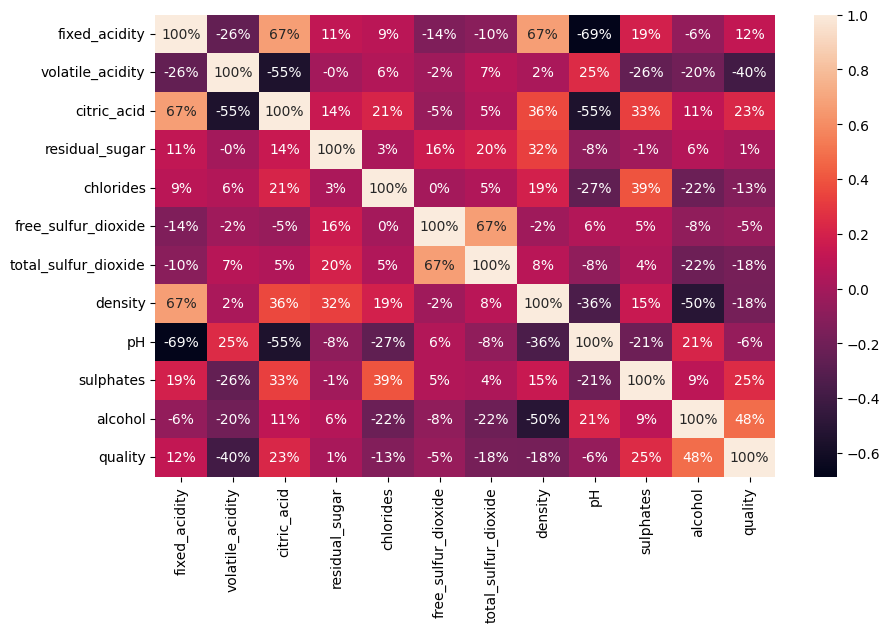

In [44]:
# Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

We are going to select the ones with bigger numbers since these are the ones that will give us more information.

To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value)

since we do not have to take into account features whose values might be redundant and not provide information at all.

In [45]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
total_sulfur_dioxide    False
density                 False
volatile_acidity         True
Name: quality, dtype: bool


From all the values, we are selecting: 

- alcohol

- sulphates

- citric_acid

- volatile_acidity

in order to study them better and see the distribution of values that separate the different qualities.

### Alcohol Percent¶

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

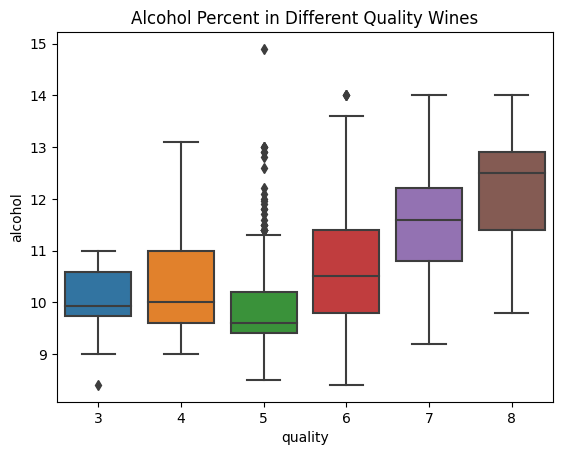

In [46]:
AlcPer = sns.boxplot(x='quality',y= 'alcohol', data= data)
AlcPer.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values. Let's do some further investigation now

In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

In [48]:
quality_with_five_six = data.loc[(data['quality'] >= 5 ) & (data['quality'] <= 6 )]
quality_with_five_six['quality'].value_counts()

quality
5    577
6    535
Name: count, dtype: int64

In [49]:
correlations_subset = quality_with_five_six.corr()['quality'].sort_values(ascending=False)
correlations_subset

quality                 1.000000
alcohol                 0.390012
sulphates               0.151655
citric_acid             0.092005
pH                      0.056222
fixed_acidity           0.049372
residual_sugar         -0.019744
free_sulfur_dioxide    -0.072737
chlorides              -0.089179
density                -0.143781
volatile_acidity       -0.240359
total_sulfur_dioxide   -0.250649
Name: quality, dtype: float64

After calculating the correlations for wines with quality of 5 and 6 we find, that features that correlate the most with quality are the same as we obtained before.
However, the difference of values shown on the boxplot can be explained due to having (although the highest) a poor correlation with quality.

### Sulphates and Citric Acid Presence¶

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

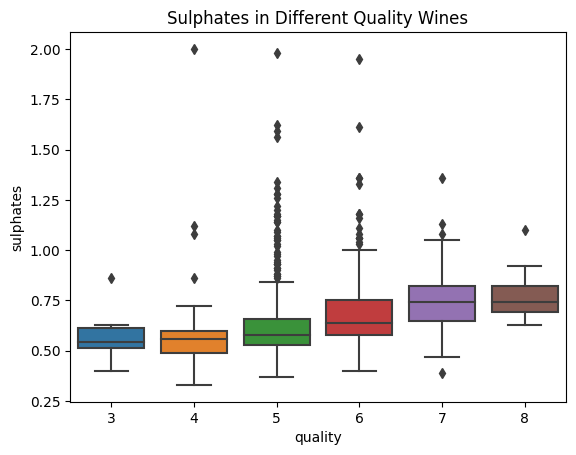

In [50]:
sulBox = sns.boxplot(x='quality',y='sulphates', data=data)
sulBox.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

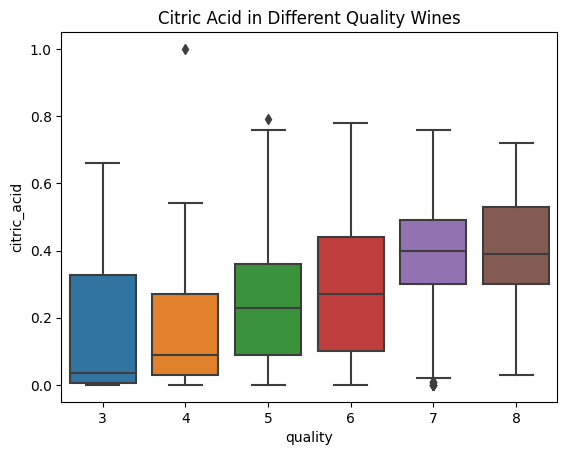

In [51]:
citBox = sns.boxplot(x='quality',y='citric_acid', data=data)
citBox.set(title="Citric Acid in Different Quality Wines")

In the case of the features "sulphates" and "citric_acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings.

### Acetic Acid Presence¶

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

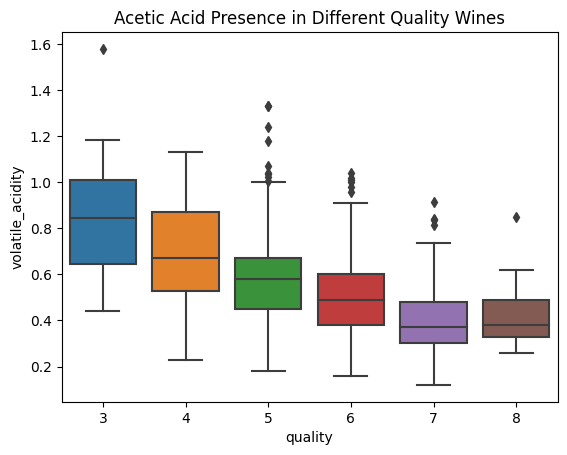

In [53]:
volacidBox = sns.boxplot(x='quality',y='volatile_acidity', data=data)
volacidBox.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

we are now going to plot histograms for each of those important features so we can see better the correlation between the distribution of values from each feature and quality.

 To do so, we are first going to separate the quality values in three different groups, so we can do things a little bit easier:

1- Low: contains wines whose quality is 3 or 4.

2- Medium: contains wines whose quality is 5 or 6.

3- High: contains wines whose quality is 7 or 8.

In [58]:
#We make a copy of our dataframe and group quality in differnt groups
data_aux = data.copy()
data_aux['quality'].replace([3,4],['low','low'],inplace=True)
data_aux['quality'].replace([5,6],['med','med'],inplace=True)
data_aux['quality'].replace([7,8],['high','high'],inplace=True)

<Axes: xlabel='quality', ylabel='count'>

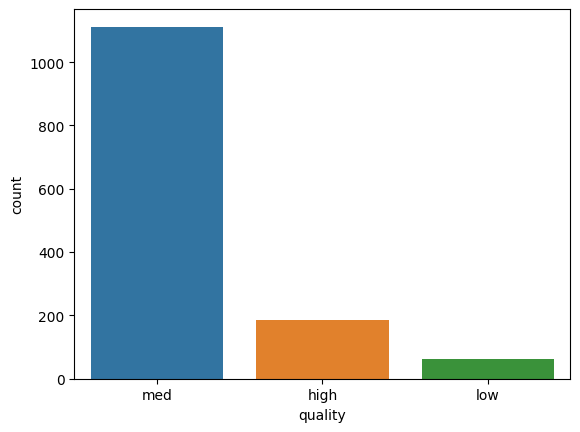

In [59]:
sns.countplot(x=data_aux['quality'])

### Feature Selection¶

Now that we have already studied our dataset through histograms and different graphics.\it's time to select some features we will use in our machine learning algorithms. 

In this specific case, what we are going to do is use the same columns we studied before, since those are the four ones that give us the most information between features and quality.

In [61]:
correlations[abs(correlations)> 0.2]

quality             1.000000
alcohol             0.480343
sulphates           0.248835
citric_acid         0.228057
volatile_acidity   -0.395214
Name: quality, dtype: float64

On this section, after having understood our data and dropped some useless features,

we are going to make an estimation of quality based on the other features. 

To do so we are going to:
- use Linear Regression
- Decision Tree Rregressor 
- Random Forest Regressor

We will also plot the values of prediction and true quality and the confussion marices, 

so we can see how many of the predicted values are right (the diagonal of the matrix).

In [65]:
#We seprate our features from our target feature (quality) and we split data intro training and test
features = data.loc[:, ['alcohol','sulphates', 'citric_acid', 'volatile_acidity']].values
label = data.iloc[:,-1].values

In [67]:
label

array([5, 5, 5, ..., 6, 5, 6])